**import library**

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


**Reading Dataset**

In [ ]:
df=pd.read_csv("3131.csv")
df['Year'] = pd.DatetimeIndex(df['datetime']).year
df['Month'] = pd.DatetimeIndex(df['datetime']).month

In [ ]:
#This gets you the minimum and maximum date of each month in a new dataframe
month_df = df.groupby(['Year','Month']).agg(month_min_date=('datetime', 'min'), month_max_date=('datetime', 'max')).reset_index()

#The following gets you opening price for the beginning of the month and closing price on the last date of each month
month_df = pd.merge(month_df,df[['datetime', 'open']],left_on='month_min_date', right_on='datetime', how='left').drop(columns= ['datetime'])
month_df = pd.merge(month_df,df[['datetime', 'close']],left_on='month_max_date', right_on='datetime', how='left').drop(columns= ['datetime'])

#Just basic renaming
month_df.rename(columns={'open': 'month_open', 'close': 'month_close'}, inplace=True)

#Converting to datetime to get the month name, this can be used for x axis plotting on a heatmap
month_df[["month_min_date", "month_max_date",]] = month_df[["month_min_date", "month_max_date",]].apply(pd.to_datetime)
month_df['month_name'] = month_df['month_min_date'].dt.month_name(locale = 'English')
month_df["month % return"]=((month_df["month_close"]-month_df["month_open"])/month_df["month_open"])*100

In [ ]:
# Drawing Pivot table
month_pivot_df = month_df.pivot_table(index='Year',columns='Month',values='month % return')

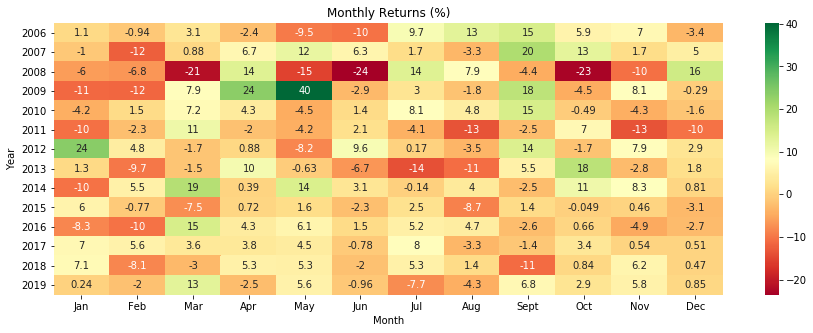

In [ ]:
# ploting Heatmap of Monthly data 
plt.figure(figsize=(15,5))
sns.heatmap(month_pivot_df,xticklabels=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],cmap='RdYlGn',annot=True)
plt.title("Monthly Returns (%)")
plt.show()

In [ ]:
df.head()

,datetime,open,high,low,close,volume
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0


*Extract Year and Month*

In [ ]:
df['year'] = pd.DatetimeIndex(df['datetime']).year

In [ ]:
df.head()

,datetime,open,high,low,close,volume,year
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0,2006
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0,2006
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0,2006
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,2006
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0,2006


In [ ]:
df['month'] = pd.DatetimeIndex(df['datetime']).month


In [ ]:
from datetime import datetime

In [ ]:
df.head()

,datetime,open,high,low,close,volume,year,month
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0,2006,1
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0,2006,1
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0,2006,1
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,2006,1
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0,2006,1


In [ ]:
# import visualization library 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Calculating formula of month return
df["month % return"]=((df["close"]-df["open"])/df["open"])*100

In [ ]:
df.head()

,datetime,open,high,low,close,volume,year,month,month % return
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0,2006,1,-0.234292
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0,2006,1,1.518278
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0,2006,1,1.614659
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,2006,1,0.981078
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0,2006,1,-0.244376


In [ ]:
# Drawing Pivot table 
df1 = df.pivot_table(index='year',columns='month',values='month % return')

In [ ]:
df1


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2006,0.016151,-0.009299,-0.052545,-0.150497,-0.527718,-0.601514,0.209594,0.400259,0.357637,0.244090,0.299973,-0.508295
2007,-0.372592,-0.567550,-0.101746,0.503590,0.434508,0.206665,0.024276,-0.191667,0.783398,0.604750,0.030167,0.057219
2008,-0.399584,-0.437481,-1.190171,0.476271,-0.714781,-0.757284,0.471471,0.520568,0.235013,-1.044111,-0.273209,0.628858
2009,-0.440822,0.268148,-0.115615,1.158091,0.854474,-0.244559,-0.100140,-0.158223,0.613367,-0.201240,0.302743,0.082787
2010,-0.204527,0.058580,0.290734,0.148391,-0.320065,0.086313,0.284712,0.253691,0.581606,-0.254150,-0.369221,-0.160033
2011,-0.603045,-0.179699,0.514820,-0.184112,-0.246658,0.163546,-0.212228,-0.663951,-0.061758,-0.183804,-0.698166,-0.447341
2012,0.704348,0.072920,-0.361949,-0.030110,-0.052236,0.316170,-0.168870,-0.171591,0.433859,-0.190296,0.231813,-0.003973
2013,-0.062115,-0.520603,-0.104861,0.441212,0.059192,-0.286148,-0.593864,-0.503382,-0.147160,0.683067,-0.216914,-0.156002
2014,-0.383494,0.207601,0.645200,-0.041898,0.238477,0.036082,-0.246423,0.116786,-0.105505,0.351472,0.293793,-0.072492


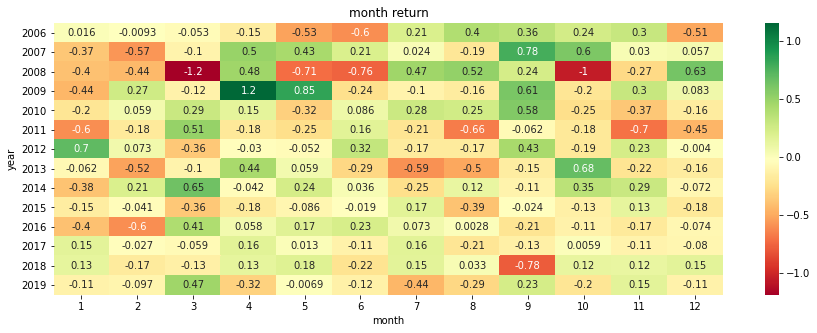

In [ ]:
# ploting Heatmap of df1 data 
plt.figure(figsize=(15,5))
sns.heatmap(df1,cmap='RdYlGn',annot=True)
plt.title("month return")
plt.show()